In [ ]:
# O intuito deste trabalho é estudar se existe alguma diferença entre um time jogar dentro ou fora de casa, tendo como ponto focal a vitória
# do time.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#importando bibliotecas uteis para o estudo.

In [3]:
all_data = pd.read_csv("/data_2020_2021.csv")

In [4]:
all_data['score1']= all_data['home_goal'] +all_data['ht_home_goal']
all_data['score2']= all_data['away_goal'] +all_data['ht_away_goal']
all_data.head(10)

# Aqui foram criadas novas colunas para poder visualisar melhor o resultado final do placar agregado. A coluna "score1" expõe os gols totais
# do time da casa e a coluna "score2" expõe os gols do time de fora.

,journee,home,away,scores,home_goal,away_goal,ht_home_goal,ht_away_goal,score1,score2
0,1. Journée,Girondins Bordeaux,FC Nantes,0:0 (0:0),0,0,0,0,0,0
1,1. Journée,Dijon FCO,Angers SCO,0:1 (0:1),0,1,0,1,0,2
2,1. Journée,Lille OSC,Stade Rennes,1:1 (1:0),1,1,1,0,2,1
3,1. Journée,AS Monaco,Stade Reims,2:2 (1:2),2,2,1,2,3,4
4,1. Journée,FC Lorient,RC Strasbourg,3:1 (0:1),3,1,0,1,3,2
5,1. Journée,Nîmes Olympique,Stade Brest,4:0 (2:0),4,0,2,0,6,0
6,1. Journée,OGC Nice,RC Lens,2:1 (1:1),2,1,1,1,3,2
7,1. Journée,Montpellier HSC,Olympique Lyon,2:1 (1:0),2,1,1,0,3,1
8,1. Journée,Paris Saint-Germain,FC Metz,1:0 (0:0),1,0,0,0,1,0
9,1. Journée,Olympique Marseille,AS Saint-Étienne,0:2 (0:1),0,2,0,1,0,3


In [14]:
def get_winners(col1, col2):
  if col1 > col2:
    val = 1
  elif col1 == col2:
    val = 3
  else:
    val = 2

  return val


all_data['Results'] = all_data.apply(lambda x: get_winners(x.score1, x.score2), axis=1)
all_data

# Nessa etapa, foi feito um tratamento para mostrar o vencedor do jogo em uma nova coluna "Results".

,journee,home,away,scores,home_goal,away_goal,ht_home_goal,ht_away_goal,score1,score2,Results
0,1. Journée,Girondins Bordeaux,FC Nantes,0:0 (0:0),0,0,0,0,0,0,3
1,1. Journée,Dijon FCO,Angers SCO,0:1 (0:1),0,1,0,1,0,2,2
2,1. Journée,Lille OSC,Stade Rennes,1:1 (1:0),1,1,1,0,2,1,1
3,1. Journée,AS Monaco,Stade Reims,2:2 (1:2),2,2,1,2,3,4,2
4,1. Journée,FC Lorient,RC Strasbourg,3:1 (0:1),3,1,0,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
375,38. Journée,FC Nantes,Montpellier HSC,1:2 (1:1),1,2,1,1,2,3,2
376,38. Journée,Stade Reims,Girondins Bordeaux,1:2 (1:1),1,2,1,1,2,3,2
377,38. Journée,Stade Rennes,Nîmes Olympique,2:0 (1:0),2,0,1,0,3,0,1
378,38. Journée,AS Saint-Étienne,Dijon FCO,0:1 (0:1),0,1,0,1,0,2,2


In [22]:
all_data.groupby('home')['Results'].mean()

# Demonstrando a media de gols em casa pelos times.

home
AS Monaco              1.578947
AS Saint-Étienne       1.947368
Angers SCO             1.842105
Dijon FCO              2.105263
FC Lorient             1.789474
FC Metz                1.947368
FC Nantes              1.842105
Girondins Bordeaux     1.894737
Lille OSC              1.736842
Montpellier HSC        1.684211
Nîmes Olympique        1.947368
OGC Nice               1.789474
Olympique Lyon         1.736842
Olympique Marseille    1.842105
Paris Saint-Germain    1.315789
RC Lens                1.631579
RC Strasbourg          1.736842
Stade Brest            1.631579
Stade Reims            2.105263
Stade Rennes           1.578947
Name: Results, dtype: float64

In [23]:
all_data.groupby('away')['Results'].mean()

# Demonstrando os gols feitos fora de casa pelos times.

away
AS Monaco              1.842105
AS Saint-Étienne       1.894737
Angers SCO             1.789474
Dijon FCO              1.473684
FC Lorient             1.421053
FC Metz                1.894737
FC Nantes              1.736842
Girondins Bordeaux     1.421053
Lille OSC              2.105263
Montpellier HSC        2.000000
Nîmes Olympique        1.631579
OGC Nice               1.842105
Olympique Lyon         2.157895
Olympique Marseille    2.052632
Paris Saint-Germain    2.000000
RC Lens                1.473684
RC Strasbourg          1.736842
Stade Brest            1.684211
Stade Reims            1.789474
Stade Rennes           1.736842
Name: Results, dtype: float64

In [15]:
all_data.corr()

# Foi feita uma tabela de correlação. Nesta tabela é possivel observar que não há uma grande diferença entre jogar em casa ou fora, visto que
# a correlação de gol dentro e fora de casa é muito semelhante. É possivel observar também que a correlação entre o resultado da partida e a
# pontuação do time dentro ou fora de casa é bem semelhante.

<ipython-input-15-42ff14a40463>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.corr()


,home_goal,away_goal,ht_home_goal,ht_away_goal,score1,score2,Results
home_goal,1.000000,-0.128708,0.662534,-0.061612,0.945247,-0.110447,-0.530321
away_goal,-0.128708,1.000000,-0.087272,0.688895,-0.122531,0.949293,0.205896
ht_home_goal,0.662534,-0.087272,1.000000,-0.055325,0.870709,-0.080766,-0.478977
ht_away_goal,-0.061612,0.688895,-0.055325,1.000000,-0.064558,0.881855,0.215366
score1,0.945247,-0.122531,0.870709,-0.064558,1.000000,-0.107707,-0.556889
score2,-0.110447,0.949293,-0.080766,0.881855,-0.107707,1.000000,0.227346
Results,-0.530321,0.205896,-0.478977,0.215366,-0.556889,0.227346,1.000000


<Axes: xlabel='Results', ylabel='count'>

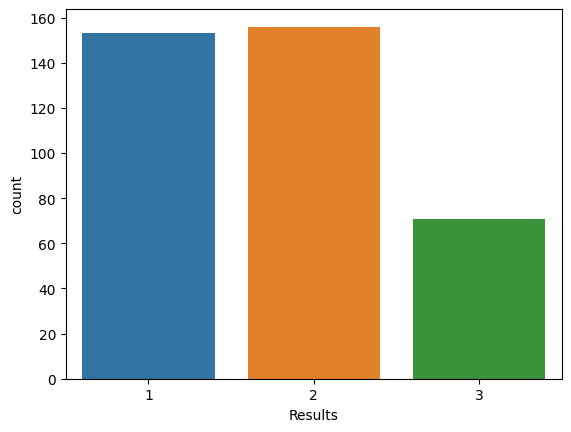

In [18]:
sns.countplot(data=all_data, x='Results')

# Nessa última fase do estudo, é possível visualizar que nao há muita diferença entre jogar dentro de casa ou fora, tendo em vista que a
# quantidade de vitorias entre o time da casa e o time de fora é praticamente igual.